In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import os 
from PIL import Image
import torch
from torchvision import transforms
import shutil

In [9]:
image_paths = Path("../data/raw/breast_ultrasound/Dataset_BUSI_with_GT/")

In [10]:
orignal_images_list = list(image_paths.rglob("?*).png"))
masked_images_list = list(image_paths.rglob("?*mask.png"))

In [11]:
len(orignal_images_list)

780

In [12]:
og_image = np.asarray(Image.open(orignal_images_list[500]))
msk_image = np.asarray(Image.open(masked_images_list[500]))

In [13]:
(og_image.shape,msk_image.shape)

((457, 562, 3), (457, 562))

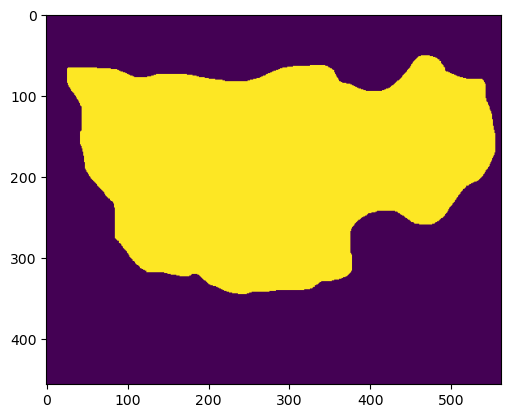

In [7]:
plt.imshow(msk_image)

In [67]:
og_image[:,:,1].shape

(471, 562)

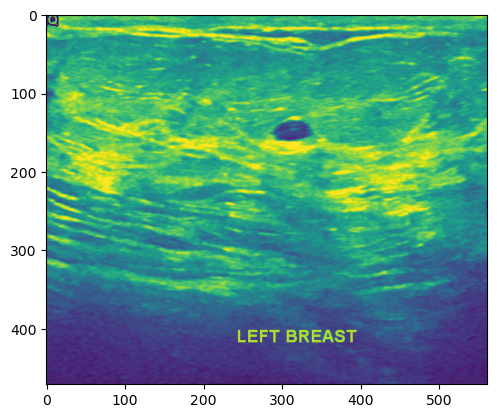

In [70]:
plt.imshow(og_image[:,:,2])

In [71]:
ch0,ch1,ch2 = og_image[:,:,0] , og_image[:,:,1] , og_image[:,:,2]

In [80]:
ch0 = ch0 * msk_image

In [81]:
ch1 = ch1 * msk_image
ch2 =  ch2 * msk_image

In [83]:
nested_images = np.array([ch0,ch1,ch2])

In [84]:
nested_images.mean()

np.float64(0.27395335131581927)

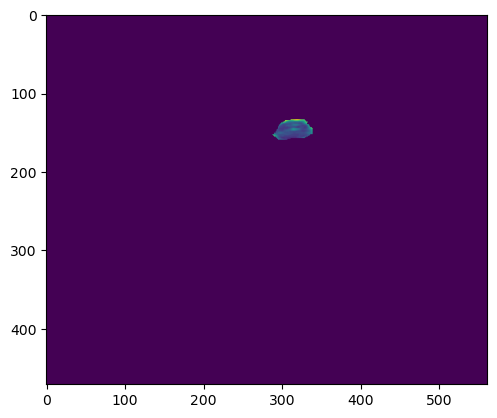

In [79]:
plt.imshow(ch0 * msk_image)

In [109]:
alpha = 0.6  # strength of highlight

# Convert mask to shape (H, W, 1)
mask_3d = msk_image[:, :, None]

highlight_color = np.array([255, 0, 0], dtype=np.uint8)

overlay = og_image.copy()
overlay = np.where(
    mask_3d,
    (alpha * highlight_color + (1 - alpha) * og_image).astype(np.uint8),
    og_image
)


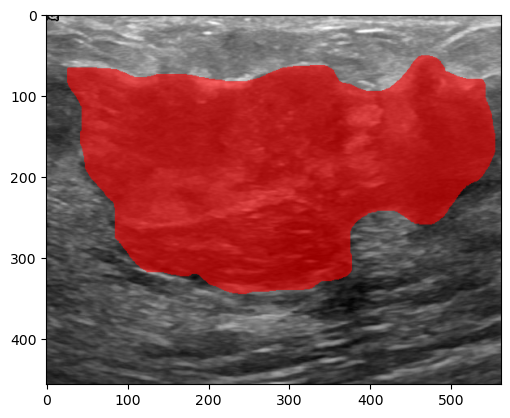

In [110]:
plt.imshow(overlay)

In [8]:
overlay = og_image.copy()

# Darken background
overlay[~msk_image] = (overlay[~msk_image] * 0.15).astype(np.uint8)


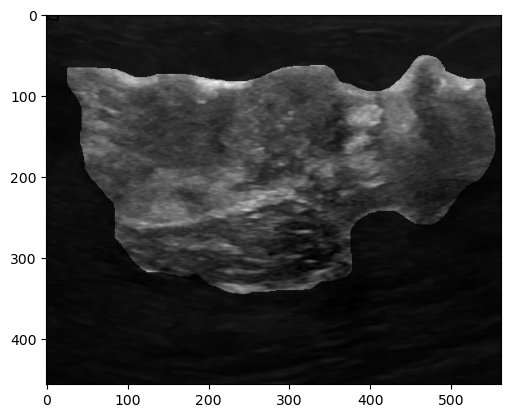

In [9]:
plt.imshow(overlay)

In [20]:
masked_images_list[647]

WindowsPath('datasets/breast_ultrasound/Dataset_BUSI_with_GT/normal/normal (1)_mask.png')

In [14]:
# configuration of the datasets
DER_PATH = "../data/proccessed/Overlay_dataset/"
target_path = Path(DER_PATH)

In [15]:
target_path

WindowsPath('../data/proccessed/Overlay_dataset')

In [19]:
for idx , (og_image, msk_image ) in enumerate(zip(orignal_images_list,masked_images_list)):
    try:
        # get class name 
        class_name = og_image.parent.name
        print(class_name)

        # read the orignal and masked images 
        img = np.asarray(Image.open(og_image))
        mask = np.asarray(Image.open(msk_image))

        if class_name != "normal":
        
            overlay = img.copy()
                # Darken background
            overlay[~mask] = (overlay[~mask] * 0.2).astype(np.uint8)
                
            # Convert back to PIL Image
            output_image = Image.fromarray(overlay)
        
        else: 
            output_image = Image.fromarray(img)
            
        # Define the target path 
        save_path = target_path / class_name / f"{class_name}_{idx}.png"
        output_image.save(save_path)
        
    except Exception as e: 
        print(f"Image mismatched at index {idx}")
        # prints the exception type + message
        print(f"{type(e).__name__}: {e}")
        # prints the full traceback
        traceback.print_exc()


benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign
benign